# Exploration liste des polluants

In [1]:
# Import des librairies nécessaires pour l'analyse des données.

import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ibis
from pipelines.tasks._common import DUCKDB_FILE

In [2]:
ibis_con = ibis.connect(DUCKDB_FILE, read_only=True)

In [3]:
ibis_con.list_tables()

['edc_communes', 'edc_prelevements', 'edc_resultats']

In [4]:
# Faisons une requête SQL en utilisant duckdb via la librarie python pour lister les substances qui ont été recherchées
# et les trier par ordre décroissant de leur nombre d'occurrences

#communes_table = ibis_con.table("edc_communes").execute()
#prelevements_table = ibis_con.table("edc_prelevements").execute()
resultats_table = ibis_con.table("edc_resultats").execute()

#display(communes_table)
#display(prelevements_table)
display(resultats_table)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,cddept,referenceprel,cdparametresiseeaux,cdparametre,libmajparametre,libminparametre,libwebparametre,qualitparam,insituana,rqana,cdunitereferencesiseeaux,cdunitereference,limitequal,refqual,valtraduite,casparam,referenceanl,de_partition,de_ingestion_date
0,001,00100128992,ASP,6489.0,ASPECT (QUALITATIF),Aspect (qualitatif),None,O,L,Aspect normal,SANS OBJET,X,None,None,0.00,None,00100136627,2022,2025-02-07
1,001,00100128992,BSIR,1042.0,BACT. ET SPORES SULFITO-RÉDU./100ML,Bact. et spores sulfito-rédu./100ml,None,N,L,<1,n/(100mL),226,None,<=0 n/(100mL),0.00,None,00100136627,2022,2025-02-07
2,001,00100128992,CDT25,1303.0,CONDUCTIVITÉ À 25°C,Conductivité à 25°C,None,N,L,678,µS/cm,147,None,>=200 et <=1100 µS/cm,678.00,None,00100136627,2022,2025-02-07
3,001,00100128992,CL,1337.0,CHLORURES,Chlorures,None,N,L,"9,9",mg/L,162,None,<=250 mg/L,9.90,None,00100136627,2022,2025-02-07
4,001,00100128992,CL2LIB,1398.0,CHLORE LIBRE,Chlore libre,None,N,T,"0,36",mg(Cl2)/L,165,None,None,0.36,None,None,2022,2025-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64164493,976,97600028234,ULOTHRI,6431.0,COLONIES DE ULOTHRICOPHYCÉES,Colonies de ulothricophycées,None,N,L,"0,0",n(colonies)/mL,452,None,None,0.00,None,97600034925,2021,2025-02-07
64164494,976,97600028234,XANTHO1,6419.0,% DE COLONIES DE XANTHOPHYCÉES,% de colonies de xanthophycées,None,N,L,"0,0",%,243,None,None,0.00,None,97600034925,2021,2025-02-07
64164495,976,97600028234,XANTHOP,6419.0,COLONIES DE XANTHOPHYCÉES,Colonies de xanthophycées,None,N,L,"0,0",n(colonies)/mL,452,None,None,0.00,None,97600034925,2021,2025-02-07
64164496,976,97600028234,ZYGOPH1,6432.0,% DE COLONIES DE ZYGOPHYCÉES,% de colonies de zygophycées,None,N,L,"11,1",%,243,None,None,11.10,None,97600034925,2021,2025-02-07


In [5]:
print(resultats_table.columns)

Index(['cddept', 'referenceprel', 'cdparametresiseeaux', 'cdparametre',
       'libmajparametre', 'libminparametre', 'libwebparametre', 'qualitparam',
       'insituana', 'rqana', 'cdunitereferencesiseeaux', 'cdunitereference',
       'limitequal', 'refqual', 'valtraduite', 'casparam', 'referenceanl',
       'de_partition', 'de_ingestion_date'],
      dtype='object')


In [6]:
# Analyse descriptive
print(resultats_table["libmajparametre"].describe())

count     64164498
unique        1588
top            PH 
freq       1742021
Name: libmajparametre, dtype: object


/var/folders/k7/bwwlkzbs4d1bbxw9drfptg2m0000gn/T/ipykernel_21391/3878697114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequence_test.values[:10], y=frequence_test.index[:10], palette="flare")


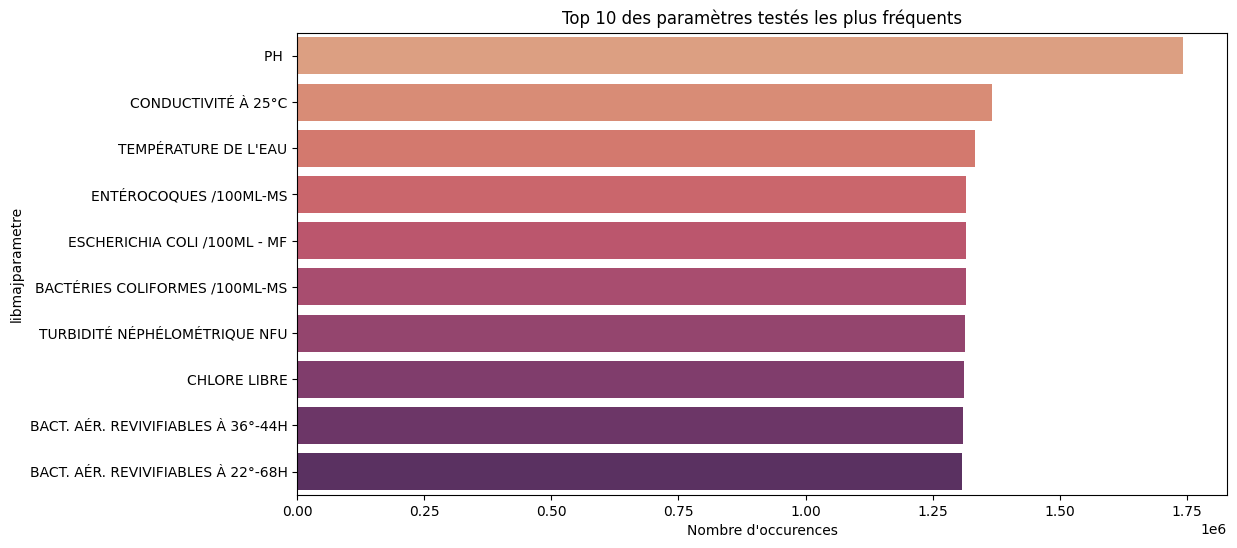

In [7]:
# Top 10 des paramètres testés les plus fréquents

frequence_test = resultats_table["libmajparametre"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=frequence_test.values[:10], y=frequence_test.index[:10], palette="flare")
plt.title("Top 10 des paramètres testés les plus fréquents")
plt.xlabel("Nombre d'occurences")
plt.show()

In [8]:
# Analyse par année
# TODO : vérifier que la bdd contient d'autres années que 2024
stats_annee = resultats_table.groupby("de_partition")["libmajparametre"].describe()
print(stats_annee)

                 count unique  top    freq
de_partition                              
2020          12406530   1299  PH   338110
2021          13260052   1341  PH   346652
2022          13328893   1361  PH   351521
2023          12782572   1334  PH   356113
2024          12386451   1337  PH   349625


In [9]:
# Filtrage des substances par recherche texte
categories_polluants = {
    "pesticides": ["azine", "phos", "triazine", "glyphosate", "atrazine", "metolachlor"],
    "nitrates et nitrites": ["nitrate", "nitrite"],
    "PFAS": ["fluoro", "perfluoro", "PFOA", "PFOS"],
    "phtalates": ["phtalate", "DEHP", "BBP", "DBP"],
    "chlorure de vinyle": ["chlorure de vinyle"],
    "hydrocarbures": ["benzène", "toluène", "naphtalène", "xylène"],
    "métaux lourds": ["mercure", "plomb", "arsenic", "cadmium", "nickel", "chrome"],
}

# Recherche dans le df
for categorie, mot_cle in categories_polluants.items():
    filtre = resultats_table["libmajparametre"].str.contains(
        "|".join(mot_cle), case=False, na=False
    )
    polluants = resultats_table[filtre]

    print(f"\n {categorie} ({len(polluants)} polluants chimiques trouvés)")
    print(polluants[["libmajparametre"]].head())



 pesticides (3046621 polluants chimiques trouvés)
                    libmajparametre
3155             ATRAZINE-2-HYDROXY
3163              ATRAZINE DÉSÉTHYL
3164    ATRAZINE DÉSÉTHYL-2-HYDROXY
3165  ATRAZINE DÉSÉTHYL DÉISOPROPYL
3166           ATRAZINE-DÉISOPROPYL

 nitrates et nitrites (1303547 polluants chimiques trouvés)
               libmajparametre
15           NITRITES (EN NO2)
16           NITRATES (EN NO3)
17    NITRATES/50 + NITRITES/3
546          NITRATES (EN NO3)
2264         NITRITES (EN NO2)

 PFAS (42488 polluants chimiques trouvés)
                libmajparametre
206782  DICHLORODIFLUOROMÉTHANE
206944   TRICHLOROFLUOROMÉTHANE
207085  DICHLORODIFLUOROMÉTHANE
207247   TRICHLOROFLUOROMÉTHANE
207388  DICHLORODIFLUOROMÉTHANE

 phtalates (1426 polluants chimiques trouvés)
                      libmajparametre
1367444       DBP (DIBUTYL PHTHALATE)
1538483         BUTYL BENZYL PHTALATE
1538514       DBP (DIBUTYL PHTHALATE)
1538515     PHTALATE DE DICYCLOHEXYLE
1538518  DEHP 

In [10]:
# Classification des polluants


def classifier_polluant(row):
    for categorie, mot_cle in categories_polluants.items():
        if any(kw in str(row).lower() for kw in mot_cle):
            return categorie
    return "Autres"


resultats_table["categorie"] = resultats_table["libmajparametre"].apply(classifier_polluant)

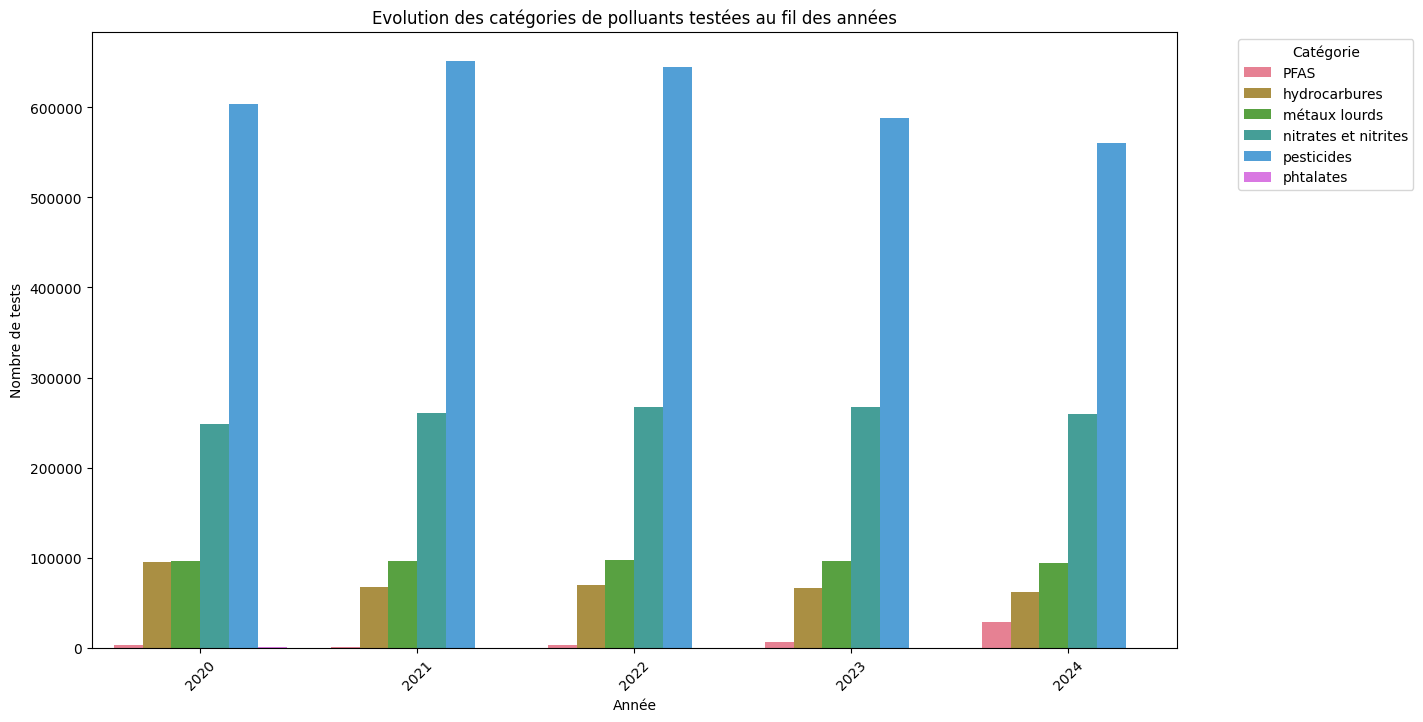

In [14]:
# Visualisation des polluants testés en fonction de l'année
df = resultats_table[resultats_table["categorie"] != "Autres"]

count_tests = (
    df.groupby(["de_partition", "categorie"]).size().reset_index(name="nb_tests")
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=count_tests, x="de_partition", y="nb_tests", hue="categorie", palette="husl"
)
plt.title("Evolution des catégories de polluants testées au fil des années")
plt.xlabel("Année")
plt.ylabel("Nombre de tests")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

/var/folders/k7/bwwlkzbs4d1bbxw9drfptg2m0000gn/T/ipykernel_21391/3568902605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequence_test.values, y=frequence_test.index, palette="flare")


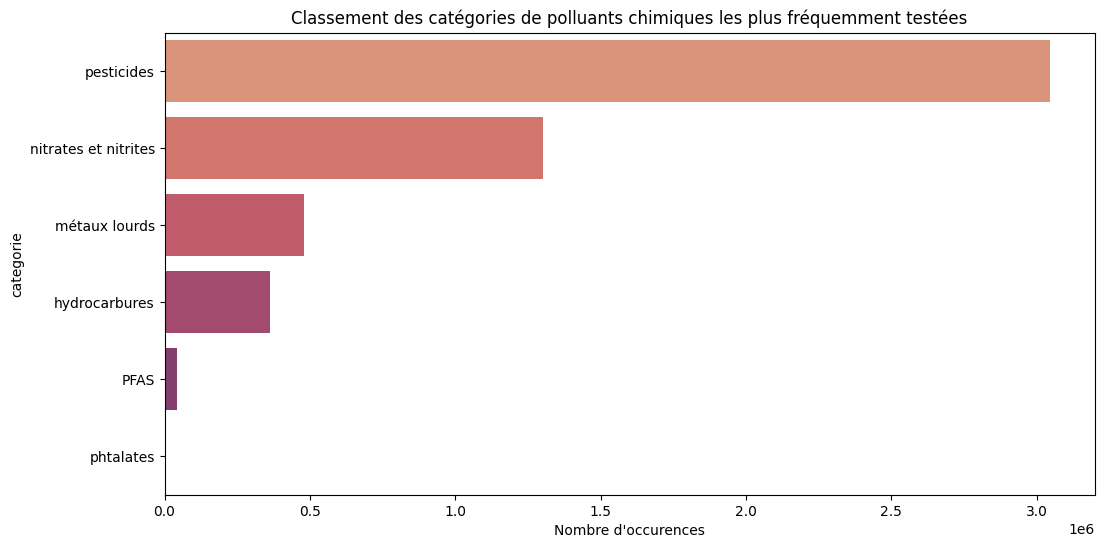

In [12]:
# Top 10 des catégories de polluants chimiques les plus fréquemment testées

frequence_test = df["categorie"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=frequence_test.values, y=frequence_test.index, palette="flare")
plt.title(
    "Classement des catégories de polluants chimiques les plus fréquemment testées"
)
plt.xlabel("Nombre d'occurences")
plt.show()